In [1]:
import tweepy
from tweepy import OAuthHandler
from tqdm import tqdm
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re as re
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from textblob import TextBlob


In [2]:
os.getcwd()
from twitter_creds import *

In [3]:
CONSUMER_KEY, CONSUMER_SECRET ,ACCESS_TOKEN ,ACCESS_TOKEN_SECRET

('xbABWuH6Eirs2VgCGsIHCIZMT',
 '6EYvnogIkVSfdVlZMV3uYnrr5Y2Mhog4jciDdBWpTPf1q3dLbP',
 '81017168-EsyZHexpVf6LxkzCU81U2Yz3cPJOyZuaOdavxQmaL',
 '4WIIk8fiZF88FLRmprz6nnr1Hu6TvwbgiVoFMS7GJjrnf')

In [4]:
def OAuthVerifier():
    '''
    This method is used to authenticate the user and create an object of the API class
    '''
    authentication = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    authentication.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
    api = tweepy.API(authentication)
    
    return api

In [5]:
api = OAuthVerifier()
username = 'elonmusk'

In [6]:
def getUserStatistics(user):
    '''
    This program is used to fetch the User information
    '''
    print('\nName : ', user.name)
    print('Screen Name : ', user.screen_name)
    print('ID : ', user.id)
    print('Account Creation Date and Time : ', user.created_at)
    print('Description : ', user.description)
    print('No. of followers : ', user.followers_count)
    print('No. of friends : ', user.friends_count)
    print('No. of favourite tweets  : ', user.favourites_count)
    print('No. of posted tweets : ', user.statuses_count)
    print('Associated URL : ', user.url)

In [7]:
user = api.me()
getUserStatistics(user)


Name :  Rahul Jain
Screen Name :  rahulxjain
ID :  81017168
Account Creation Date and Time :  2009-10-09 03:29:56
Description :  
No. of followers :  39
No. of friends :  72
No. of favourite tweets  :  2
No. of posted tweets :  15
Associated URL :  None


In [8]:
tweets = tweepy.Cursor(api.user_timeline, screen_name = username, tweet_mode='extended').items()

In [9]:
type(tweets)

tweepy.cursor.ItemIterator

In [10]:
##creating a disctionary object having various fields 
tweet_dict = []

for t in tqdm(tweets):
    dic = {}
    dic['created_at'] = t.created_at
    dic['favorite_count'] = t.favorite_count
    dic['retweet_count'] = t.retweet_count
    dic['full_text'] = t.full_text
    dic['screen_name'] = t.user.screen_name
    tweet_dict.append(dic)

3215it [01:12, 44.14it/s]


In [11]:
len(tweet_dict)

3215

In [12]:
tweet_dict[5]

{'created_at': datetime.datetime(2019, 4, 1, 1, 34, 42),
 'favorite_count': 45539,
 'full_text': 'Making The Onion articles real …\nhttps://t.co/O7855d9BWu',
 'retweet_count': 5567,
 'screen_name': 'elonmusk'}

# Lets convert the dict list into pandas dataframe

In [13]:
elon_tweet = pd.DataFrame.from_dict(tweet_dict)

In [14]:
len(elon_tweet)

3215

In [15]:
elon_tweet.describe(include='all')

,created_at,favorite_count,full_text,retweet_count,screen_name
count,3215,3.215000e+03,3215,3215.000000,3215
unique,3212,NaN,3213,NaN,1
top,2018-05-23 22:58:07,NaN,@Erdayastronaut Yes,NaN,elonmusk
freq,2,NaN,2,NaN,3215
first,2018-02-21 13:06:19,NaN,NaN,NaN,NaN
last,2019-04-01 03:54:10,NaN,NaN,NaN,NaN
mean,NaN,1.697655e+04,NaN,2543.695801,NaN
std,NaN,5.005134e+04,NaN,11161.600001,NaN
min,NaN,0.000000e+00,NaN,4.000000,NaN
25%,NaN,7.280000e+02,NaN,48.000000,NaN


In [16]:
elon_tweet.dtypes

created_at        datetime64[ns]
favorite_count             int64
full_text                 object
retweet_count              int64
screen_name               object
dtype: object

# Lets create a few new features as year , month, day of week etc.

In [17]:
elon_tweet['created_year'] = elon_tweet['created_at'].dt.year

In [18]:
elon_tweet['created_year'].unique()

array([2019, 2018])

In [19]:
min(elon_tweet['created_at']),max(elon_tweet['created_at'])

(Timestamp('2018-02-21 13:06:19'), Timestamp('2019-04-01 03:54:10'))

# The oldest tweet we have received is from 21st Feb, 2018 and the latest tweet is from today, 1st Apr 2019

In [20]:
##checking the latest tweet
elon_tweet.iloc[0,2]

'@ChrisRauhl @Tesla Yes'

In [21]:
elon_tweet.head()

,created_at,favorite_count,full_text,retweet_count,screen_name,created_year
0,2019-04-01 03:54:10,484,@ChrisRauhl @Tesla Yes,12,elonmusk,2019
1,2019-04-01 03:24:23,699,@JONAHFORMAN Yes,31,elonmusk,2019
2,2019-04-01 02:21:37,2650,@carolineplz Seems fair,39,elonmusk,2019
3,2019-04-01 01:41:26,4794,@D_A_M_B Some people use their hair to express...,312,elonmusk,2019
4,2019-04-01 01:40:37,16978,.@TheOnion,369,elonmusk,2019


In [22]:
elon_tweet['created_month']=elon_tweet['created_at'].dt.month

In [23]:
elon_tweet['created_month'].nunique(),elon_tweet['created_month'].unique()

(12, array([ 4,  3,  2,  1, 12, 11, 10,  9,  8,  7,  6,  5]))

In [24]:
elon_tweet['created_dayofweek']=elon_tweet['created_at'].dt.dayofweek

In [29]:
elon_tweet['created_day_name']=elon_tweet['created_at'].dt.weekday_name

In [30]:
elon_tweet['created_dayofweek'].nunique(),elon_tweet['created_dayofweek'].unique()

(7, array([0, 6, 5, 4, 3, 2, 1]))

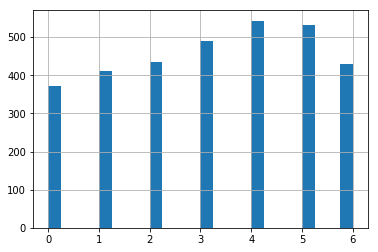

In [32]:
elon_tweet['created_dayofweek'].hist(bins=24)

**Looks like Elon Musk's frequency of tweeting increases as weekend approaches :)

**He tweets maximum on Fridays and Saturdays .. for obvious reasons, off-office hours

**Sunday he relaxes a bit :)

In [33]:
elon_tweet['created_date']=elon_tweet['created_at'].dt.date

In [34]:
min(elon_tweet['created_date']),max(elon_tweet['created_date'])

(datetime.date(2018, 2, 21), datetime.date(2019, 4, 1))

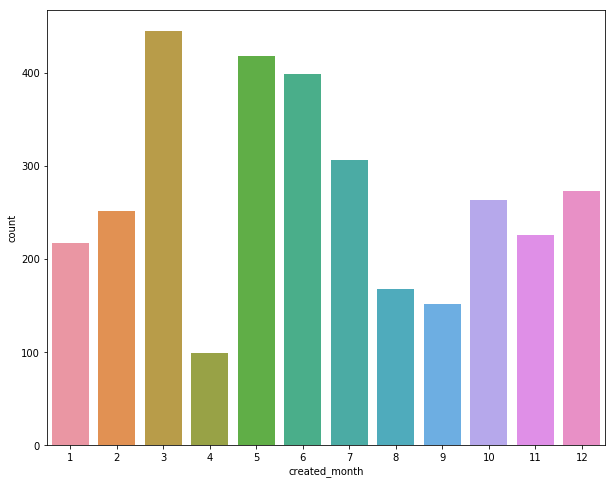

In [35]:
ax = plt.figure(figsize=(10,8))
plot = sns.countplot(x=elon_tweet.created_month,data=elon_tweet)

**And he is most active during the months of Mar, May and June

In [36]:
elon_tweet['created_time']=elon_tweet['created_at'].dt.hour

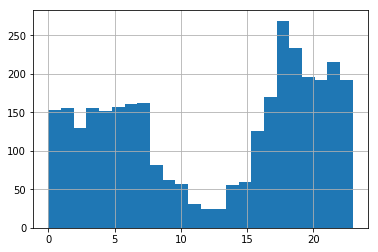

In [37]:
elon_tweet['created_time'].hist(bins=24)

***The most number of tweets he makes are between 5 Pm and 8 PM, i.e. after leaving office and Supper

***The least number of tweets comes between lunch hours which is expected

# Generating a new feature called Virality which tells us how viral was the tweet

In [38]:

elon_tweet['virality'] = elon_tweet['favorite_count'] + 10 * elon_tweet['retweet_count'] 

In [39]:
elon_tweet.head()

,created_at,favorite_count,full_text,retweet_count,screen_name,created_year,created_month,created_dayofweek,created_day_name,created_date,created_time,virality
0,2019-04-01 03:54:10,484,@ChrisRauhl @Tesla Yes,12,elonmusk,2019,4,0,Monday,2019-04-01,3,604
1,2019-04-01 03:24:23,699,@JONAHFORMAN Yes,31,elonmusk,2019,4,0,Monday,2019-04-01,3,1009
2,2019-04-01 02:21:37,2650,@carolineplz Seems fair,39,elonmusk,2019,4,0,Monday,2019-04-01,2,3040
3,2019-04-01 01:41:26,4794,@D_A_M_B Some people use their hair to express...,312,elonmusk,2019,4,0,Monday,2019-04-01,1,7914
4,2019-04-01 01:40:37,16978,.@TheOnion,369,elonmusk,2019,4,0,Monday,2019-04-01,1,20668


In [40]:
elon_tweet.sort_values(by = 'virality',axis=0,ascending=False).head(10).full_text.values

array(['Had to been done ur welcome https://t.co/7jT0f9lqIS',
       'There are no coincidences https://t.co/9AEbbuXZGn',
       'Host meme review? https://t.co/k2SFtIUh1k', 'i🖤anime',
       'Yeah, I lift a little … https://t.co/UAJdv8qSw1',
       'Oh btw I’m building a cyborg dragon',
       'RT @NASA: Remembering Stephen Hawking, a renowned physicist and ambassador of science. His theories unlocked a universe of possibilities th…',
       'Rest in peace, Stan Lee. The many worlds of imagination &amp; delight you created for humanity will last forever.',
       'How’d they know!? https://t.co/AZh4EOrgmc',
       '😅 thank goodness it’s not November https://t.co/ius8kAptiC'],
      dtype=object)

***Which tweets went viral --
1. The ones which had some links in it
2. He expressed his love to something, i guess that animation 
3. He mentioned his upcoming project
4. He vent out emotions 

In [41]:
elon_tweet.loc[elon_tweet['full_text'].str.len() < 5]

,created_at,favorite_count,full_text,retweet_count,screen_name,created_year,created_month,created_dayofweek,created_day_name,created_date,created_time,virality
29,2019-03-30 06:21:30,57207,Lame,4888,elonmusk,2019,3,5,Saturday,2019-03-30,6,106087
30,2019-03-30 06:02:00,188955,🦆,24924,elonmusk,2019,3,5,Saturday,2019-03-30,6,438195
739,2019-01-04 19:47:50,151415,…,22096,elonmusk,2019,1,4,Friday,2019-01-04,19,372375
764,2019-01-01 00:20:48,179968,Haha,33047,elonmusk,2019,1,1,Tuesday,2019-01-01,0,510438
1319,2018-10-25 23:21:00,63429,Time,6824,elonmusk,2018,10,3,Thursday,2018-10-25,23,131669
1764,2018-08-11 03:50:56,35894,S3XY,8143,elonmusk,2018,8,5,Saturday,2018-08-11,3,117324
1867,2018-07-29 21:04:01,18912,0,1669,elonmusk,2018,7,6,Sunday,2018-07-29,21,35602
2846,2018-05-18 07:05:53,47426,🐌,7282,elonmusk,2018,5,4,Friday,2018-05-18,7,120246


# Cleaning up tweets
1. Bringing the text to lowercase
2. Removing new line character '\n'
3. Removing the http
4. Removing the special character like @
5. Removing stop words
6. Removing the words with length < 3
7. Removing the &amp text

In [42]:
elon_tweet['clean_text'] = elon_tweet['full_text']

In [43]:
####1. Bringing the text to lowercase
elon_tweet['clean_text'] = elon_tweet['clean_text'].str.lower()

In [44]:
##2. Removing new line character '\n'
elon_tweet.loc[elon_tweet['clean_text'].str.match('.\n')]

,created_at,favorite_count,full_text,retweet_count,screen_name,created_year,created_month,created_dayofweek,created_day_name,created_date,created_time,virality,clean_text
2632,2018-05-27 01:00:33,9124,😃\nhttps://t.co/9kUYHCCaRN,778,elonmusk,2018,5,6,Sunday,2018-05-27,1,16904,😃\nhttps://t.co/9kuyhccarn


In [45]:
elon_tweet['clean_text'] = elon_tweet['clean_text'].str.replace('\n',' ')

In [46]:
elon_tweet.loc[elon_tweet['clean_text'].str.match('.\n')]

,created_at,favorite_count,full_text,retweet_count,screen_name,created_year,created_month,created_dayofweek,created_day_name,created_date,created_time,virality,clean_text


In [47]:
##5. Removing stop words
elon_tweet['clean_text'] = elon_tweet['clean_text'].apply(lambda x : ' '.join([word for word in x.split() if word not in stop_words]))

In [48]:
##4. Removing the special character like @  3. Removing the http
elon_tweet['clean_text'] = elon_tweet['clean_text'].apply(lambda x : ' '.join([word for word in x.split() if not re.search(r'((http)|@)+',word)]))

In [49]:
elon_tweet['clean_text'].apply(lambda x : ' '.join([word for word in x.split() if  re.search(r'(;)+',word)])).head(5)

0    
1    
2    
3    
4    
Name: clean_text, dtype: object

&amp doesnt seem to be of any signifigance to me. so will get rid of that

In [50]:
##7. Removing the &amp text
elon_tweet['clean_text'] = elon_tweet['clean_text'].apply(lambda x : ' '.join([word for word in x.split() if not re.search(r'(;)+',word)]))

In [51]:
##5. Removing the words with length less than 3
elon_tweet['clean_text'] = elon_tweet['clean_text'].apply(lambda x : ' '.join([word for word in x.split() if len(word) > 2 ]))

In [52]:
elon_tweet[['clean_text','created_date']].tail(10)

,clean_text,created_date
3205,successful deployment paz satellite low-earth ...,2018-02-22
3206,made back space fairing parafoil deployed. try...,2018-02-22
3207,going try catch giant fairing (nosecone) falco...,2018-02-22
3208,"love drones house, you’ll really love vast num...",2018-02-22
3209,"sure. let know, it’s still going. literally ze...",2018-02-22
3210,that’s random,2018-02-21
3211,"anyone curious, name inspired fault stars",2018-02-21
3212,openai supporters:,2018-02-21
3213,high altitude wind shear data shows probable l...,2018-02-21
3214,today’s falcon launch carries spacex test sate...,2018-02-21


# Sentiment Analysis - TextBlob - Finds the Polarity of the statement

In [53]:
##elon_tweet['clean_text'] = 
elon_tweet['SA'] = elon_tweet['clean_text'].apply(lambda x : 1 if TextBlob(x).sentiment.polarity > 0 else -1 if TextBlob(x).sentiment.polarity < 0 else 0)

In [54]:
elon_tweet['SA'].unique()

array([ 0,  1, -1])

In [55]:
elon_tweet[['clean_text','SA']].head()

,clean_text,SA
0,yes,0
1,yes,0
2,seems fair,1
3,"people use hair express themselves, use twitter",0
4,,0


In [56]:
elon_tweet[['clean_text','SA']].groupby(by = 'SA').count()

,clean_text
SA,
-1,408
0,1360
1,1447


In [57]:
pos_tweet = elon_tweet.loc[elon_tweet.SA == 1]
neu_tweet = elon_tweet.loc[elon_tweet.SA == 0]
neg_tweet = elon_tweet.loc[elon_tweet.SA == -1]

In [58]:
print('Positive tweets % : {0:.2f}'.format(len(pos_tweet) * 100 /len(elon_tweet)))
print('Neutral tweets % : {0:.2f}%'.format(len(neu_tweet) * 100 /len(elon_tweet)))
print('Negative tweets % : {0:.2f}%'.format(len(neg_tweet) * 100 /len(elon_tweet)))

Positive tweets % : 45.01
Neutral tweets % : 42.30%
Negative tweets % : 12.69%


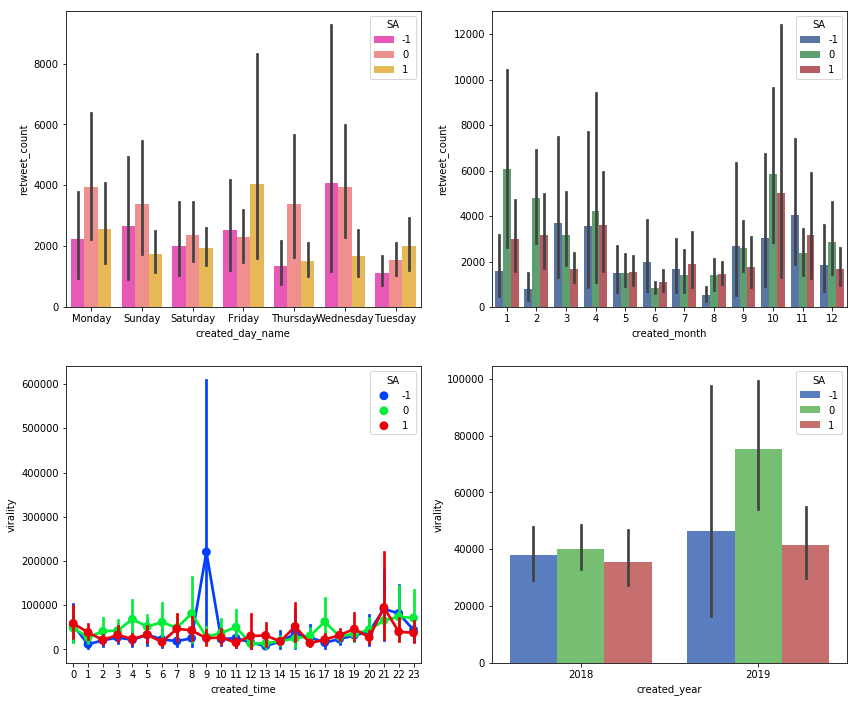

In [80]:
_,ax = plt.subplots(2,2,figsize=(14,12))
sns.barplot(x='created_day_name',y='retweet_count',hue='SA',data=elon_tweet,ax=ax[0,0],palette='spring')
sns.barplot(x='created_month',y='retweet_count',hue='SA',data=elon_tweet,ax=ax[0,1],palette='deep')
sns.pointplot(x='created_time',y='virality',hue='SA',data=elon_tweet,ax=ax[1,0],palette='bright')
sns.barplot(x='created_year',y='virality',hue='SA',data=elon_tweet,ax=ax[1,1],palette='muted')


# **Insights
1. Elon tweets maximum num of positive tweets on a friday, thats obvious , approaching weekend.
2. He tweets maximum negative comments on Wed. Thats middle of week. Understandable
3. The maximum retweet happened in the month of Jan and Oct. Well new year new strategies and Oct, about to close.
4. The most viral negative tweets happened at 9 AM.
5. The most viral positive tweets happened at 9 PM.
6. He tweeted more in 2019 than in 2018. This year he was more diplomatic in his comments and hence the highest percentage of his tweets were neutral in nature. :) Second highest being negative comments.

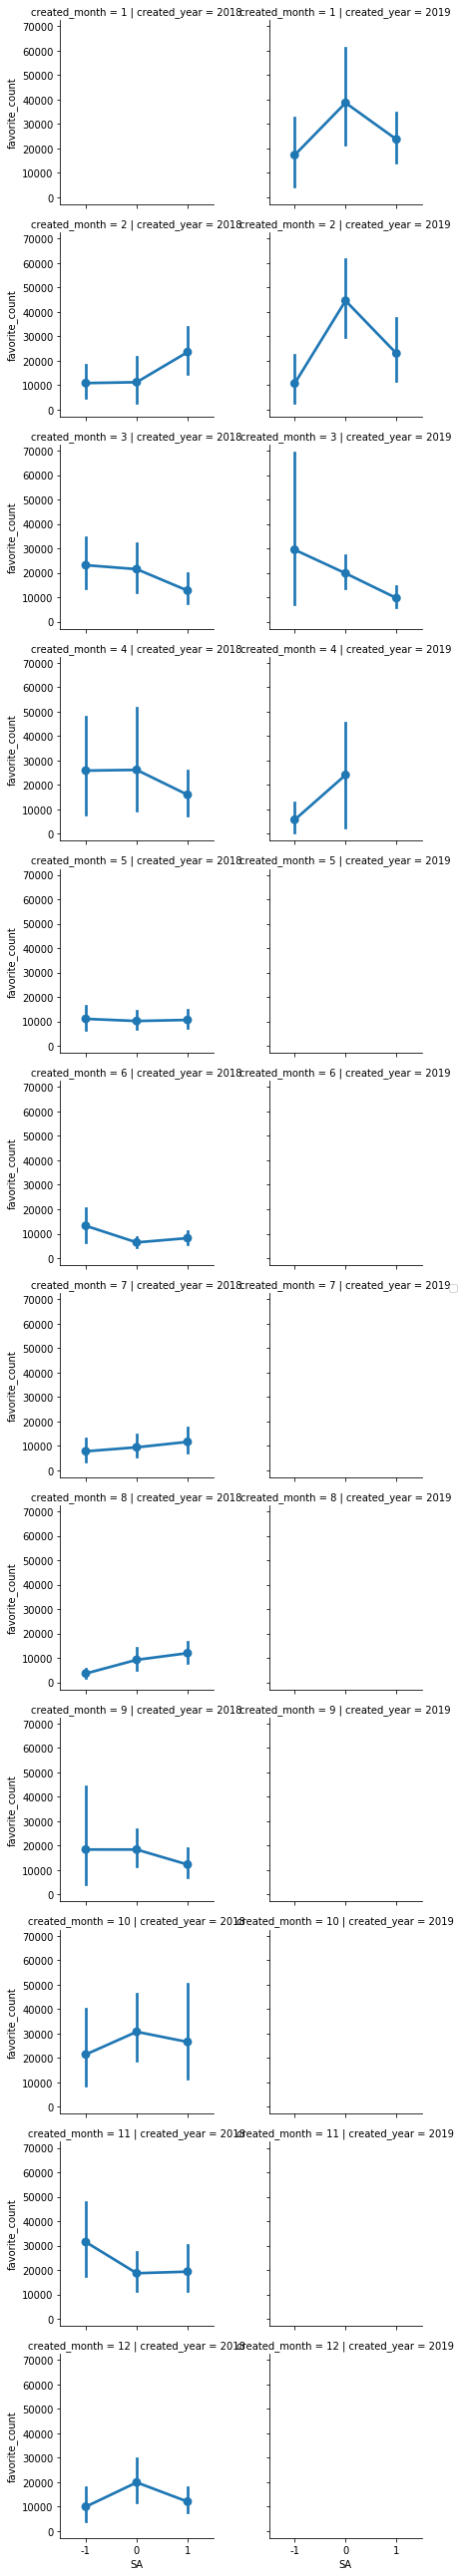

In [114]:
bar = sns.FacetGrid(elon_tweet,row='created_month',col = 'created_year')
bar.map(sns.pointplot,'SA','favorite_count')
bar.add_legend()

In [ ]:
## Indicoio API Key ->  1afab6f1942c6a8050ea3156dc95eb79